In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("Analysis/Data/goldprices.pkl")

Text(0, 0.5, 'US$')

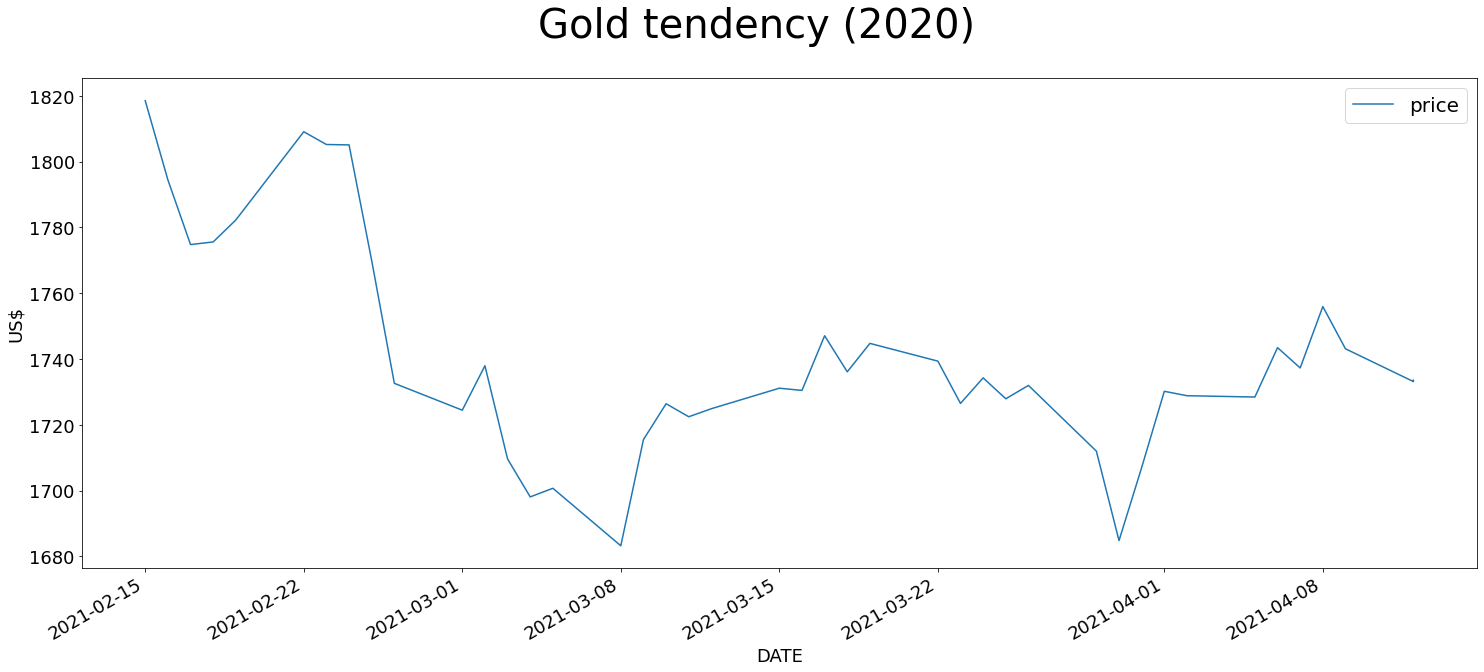

In [3]:
df_updated = df
df_updated = df_updated.drop(df_updated[df_updated["year"] <= 2020].index)

df_updated["month"] = df_updated["month"].replace({"January": "01", "February": "02","March": "03","April": "04",
                                     "May": "05","June": "06", "July": "07","August": "08",
                                     "September": "09","October": "10", "November": "11","December": "12"})

df_updated['date']= pd.to_datetime({'year': df_updated["year"], 'month': df_updated["month"], 'day': df_updated['day']})

df_updated = df_updated[['date','price']] 

df_updated = df_updated.set_index("date")

df_updated.plot(figsize=(25,10), fontsize=18)
plt.suptitle('Gold tendency (2020)', fontsize=40)
plt.legend( fontsize=20)
plt.xlabel('DATE', fontsize=18)
plt.ylabel('US$', fontsize=18)

Text(0, 0.5, 'US$')

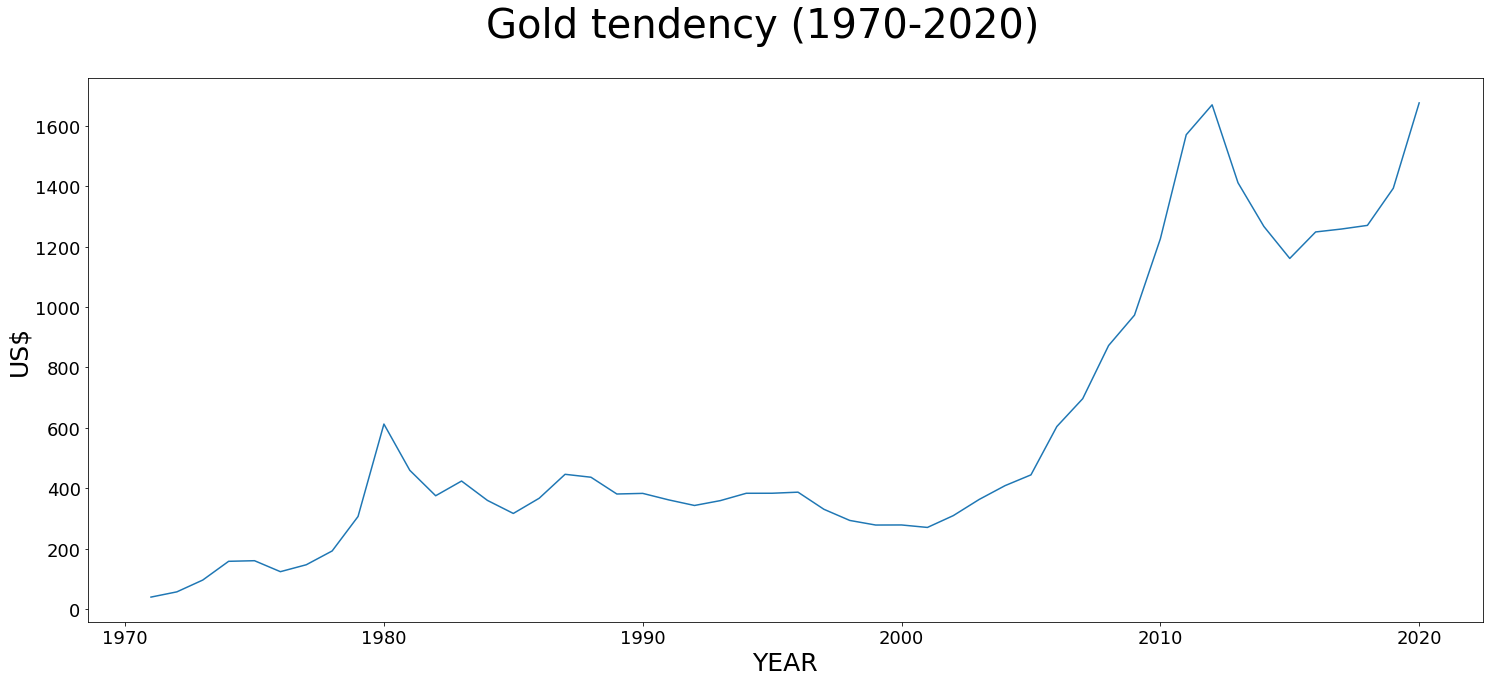

In [4]:
df_historic = df
df_historic = df_historic.drop(df_historic[df_historic["year"] >= 2021].index)
df_historic = df_historic.drop(df_historic[df_historic["year"] <= 1970].index)
df_historic = df_historic.drop(['currency','day','month'], axis = 1)
df_historic = df_historic.set_index("year")
df_historic = round(df_historic.groupby('year')['price'].mean(),2)
df_historic.plot(figsize=(25,10), fontsize=18)
plt.suptitle('Gold tendency (1970-2020)', fontsize=40)
plt.xlabel('YEAR', fontsize=25 )
plt.ylabel('US$', fontsize=25)